In [1]:
import pandas as pd
dataset=pd.read_csv("insurance_pre.csv")


In [2]:
#dataset.columns

In [3]:
#convert dataset as numerical data
dataset=pd.get_dummies(dataset, drop_first=True, dtype=int)

In [4]:
dataset.columns


Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
# split input and output data
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dependent=dataset[['charges']]

In [6]:
# Split data for train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test =train_test_split(independent,dependent,test_size=.3, random_state=1)

In [7]:
X_train,X_test, Y_train,Y_test

(      age     bmi  children  sex_male  smoker_yes
 744    50  26.410         0         1           0
 363    21  26.400         1         0           0
 10     25  26.220         0         1           0
 970    50  28.160         3         0           0
 634    51  39.700         1         1           0
 ...   ...     ...       ...       ...         ...
 715    60  28.900         0         1           0
 905    26  29.355         2         0           0
 1096   51  34.960         2         0           1
 235    40  22.220         2         0           1
 1061   57  27.940         1         1           0
 
 [936 rows x 5 columns],
       age     bmi  children  sex_male  smoker_yes
 559    19  35.530         0         1           0
 1087   57  31.540         0         1           0
 1020   51  37.000         0         1           0
 460    49  36.630         3         0           0
 802    21  22.300         1         1           0
 ...   ...     ...       ...       ...         ...
 323

In [8]:
# preprocessing the data in a range

#from sklearn.preprocessing import StandardScaler
#SS= StandardScaler()
#X_train = SS.fit_transform(X_train)
#X_test= SS.transform(X_test)

In [9]:
# model creation
from sklearn.tree import DecisionTreeRegressor


#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='sqrt', splitter='best')  # 0.6795533641359489
#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='sqrt', splitter='random') # 0.6973832909326495

#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='auto', splitter='best')  # 0.6623132903803661
#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='auto', splitter='random') # 0.6980933984406023

#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='log2', splitter='best')  # 0.6398772872609122
#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='log2', splitter='random') # 0.6738577749631401

#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='auto', splitter='best') # 0.658603507799159
#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',splitter='random') # 0.7193753715117888

#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt', splitter='best') # 0.7149923349432595
#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt', splitter='random') #0.7076350768998017

#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='log2', splitter='best') # 0.6795796589117227
#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='log2', splitter='random') # 0.7003518431318947

#regresser=DecisionTreeRegressor(criterion='poisson', max_features='sqrt', splitter='best') # 0.6370151046264717
#regresser=DecisionTreeRegressor(criterion='poisson', max_features='sqrt', splitter='random') # 0.5985342184884453

#regresser=DecisionTreeRegressor(criterion='poisson', max_features='auto', splitter='best')  # 0.6568278169253381
#regresser=DecisionTreeRegressor(criterion='poisson', max_features='auto', splitter='random') # 0.7189475453842333


#regresser=DecisionTreeRegressor(criterion='poisson', max_features='log2', splitter='best') # 0.7055156335899738
#regresser=DecisionTreeRegressor(criterion='poisson', max_features='log2', splitter='random') # 0.6302975320496209

regresser=DecisionTreeRegressor(criterion='absolute_error', max_features='sqrt', splitter='best') # 0.7245625680549648
#regresser=DecisionTreeRegressor(criterion='absolute_error', max_features='sqrt', splitter='random') # 0.655196143279222

#regresser=DecisionTreeRegressor(criterion='absolute_error', max_features='auto', splitter='best') # 0.6680274089885903
#regresser=DecisionTreeRegressor(criterion='absolute_error', max_features='auto', splitter='random') # 0.7241032787882982

#regresser=DecisionTreeRegressor(criterion='absolute_error', max_features='log2', splitter='best') # 0.696800897820590
#regresser=DecisionTreeRegressor(criterion='absolute_error', max_features='log2', splitter='random') #0.6321518603315901



regresser=regresser.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


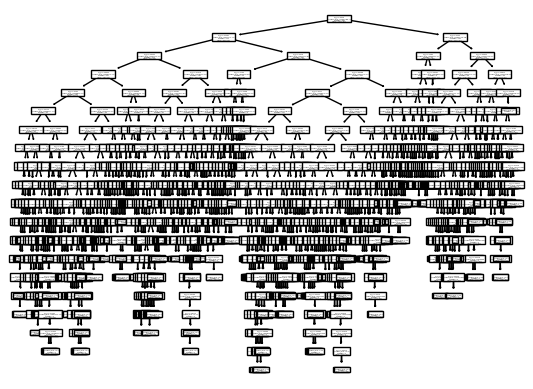

In [10]:
# plot the tree
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regresser)
plt.show()

In [11]:
Y_pred=regresser.predict(X_test)

In [12]:
# Find r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test,Y_pred)

In [13]:
r2_score

0.7193753715117888

In [14]:
# save model
import pickle
pickle.dump(regresser,open("model_decision_tree_Regression.sav",'wb'))

In [15]:
loaded_model=pickle.load(open("model_decision_tree_Regression.sav",'rb'))

In [16]:
loaded_model.predict([[12,35,400,0,1]])


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([34303.1672])